In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "winequality-red.csv"
dataset = pd.read_csv(file)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
pd.isnull(dataset).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
dataset["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [5]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [9]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6) # 6 features
kmeans.fit(X)


KMeans(n_clusters=6)

In [11]:
cluster = kmeans.predict(X)
cluster

array([1, 1, 1, ..., 3, 1, 3], dtype=int32)

In [12]:
kmeans.cluster_centers_

array([[-8.58879039e-02,  3.20116941e-02,  6.77738973e-02,
        -2.37272014e-02, -3.67139163e-02,  1.00499676e+00,
         1.21606003e+00,  2.14057453e-01, -1.25529957e-01,
        -1.74496551e-01, -5.61423665e-01],
       [-4.83087044e-01,  6.86745320e-01, -8.29218438e-01,
        -1.90658328e-01, -6.10363297e-02, -4.18915393e-01,
        -4.12166070e-01, -6.13145299e-02,  4.27494584e-01,
        -3.91981169e-01, -4.14154748e-01],
       [ 1.35183504e+00, -6.72051663e-01,  1.12797200e+00,
         7.43698218e-02, -1.02101181e-02, -5.66326673e-01,
        -5.37326706e-01,  7.82495215e-01, -8.52929005e-01,
         3.36231790e-01,  1.63474007e-01],
       [-6.73341791e-01, -4.47490136e-01, -1.20117548e-01,
        -2.51088620e-01, -4.13308535e-01,  7.67848624e-02,
        -2.61170387e-01, -1.24275832e+00,  6.14189202e-01,
         1.54298299e-01,  1.31592968e+00],
       [ 9.54162998e-02,  2.19980305e-03,  1.18155266e+00,
        -3.89872163e-01,  5.78475973e+00, -4.95156003e-02,
  

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pd.DataFrame(pca.fit_transform(X), columns=["PCA1","PCA2"])
centers_reduced = pd.DataFrame(pca.transform(kmeans.cluster_centers_), columns=["PCA1","PCA2"])
X_reduced

,PCA1,PCA2
0,-1.619530,0.450950
1,-0.799170,1.856553
2,-0.748479,0.882039
3,2.357673,-0.269976
4,-1.619530,0.450950
...,...,...
1594,-2.150500,0.814286
1595,-2.214496,0.893101
1596,-1.456129,0.311746
1597,-2.270518,0.979791


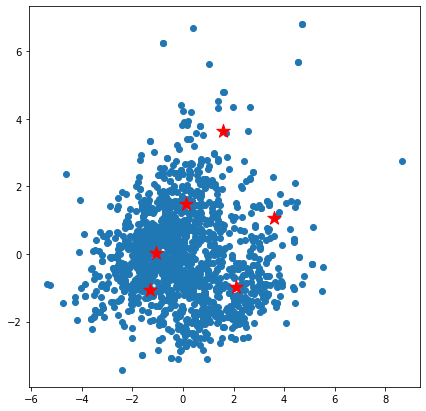

In [25]:
plt.figure(figsize=(7,7))
plt.scatter(x = X_reduced["PCA1"],y= X_reduced["PCA2"])
plt.scatter(x = centers_reduced["PCA1"], y=centers_reduced["PCA2"],color="red",marker="*", s=200)

In [21]:
X_reduced["clusters"] = cluster
X_reduced

,PCA1,PCA2,clusters
0,-1.619530,0.450950,1
1,-0.799170,1.856553,1
2,-0.748479,0.882039,1
3,2.357673,-0.269976,2
4,-1.619530,0.450950,1
...,...,...,...
1594,-2.150500,0.814286,1
1595,-2.214496,0.893101,3
1596,-1.456129,0.311746,3
1597,-2.270518,0.979791,1


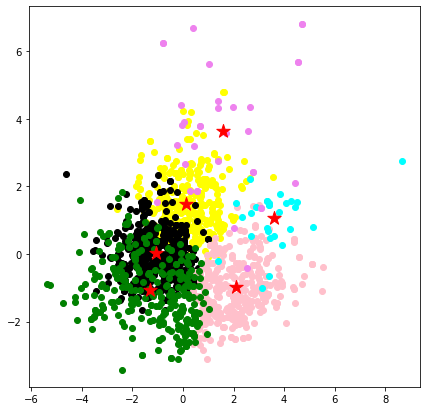

In [22]:
plt.figure(figsize = (7,7))
plt.scatter(x=X_reduced[X_reduced["clusters"]==0]["PCA1"],y=X_reduced[X_reduced["clusters"]==0]["PCA2"], color="yellow")
plt.scatter(x=X_reduced[X_reduced["clusters"]==1]["PCA1"],y=X_reduced[X_reduced["clusters"]==1]["PCA2"], color="black")
plt.scatter(x=X_reduced[X_reduced["clusters"]==2]["PCA1"],y=X_reduced[X_reduced["clusters"]==2]["PCA2"], color="pink")
plt.scatter(x=X_reduced[X_reduced["clusters"]==3]["PCA1"],y=X_reduced[X_reduced["clusters"]==3]["PCA2"], color="green")
plt.scatter(x=X_reduced[X_reduced["clusters"]==4]["PCA1"],y=X_reduced[X_reduced["clusters"]==4]["PCA2"], color="cyan")
plt.scatter(x=X_reduced[X_reduced["clusters"]==5]["PCA1"],y=X_reduced[X_reduced["clusters"]==5]["PCA2"], color="violet")
plt.scatter(x=centers_reduced["PCA1"] ,y=centers_reduced["PCA2"], color= "red", marker="*", s=200)